In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
train_x = pd.read_csv('../../data/x_train_new.csv')
train_y = pd.read_csv('../../data/y_train_new.csv')
valid_x = pd.read_csv('../../data/x_valid_new.csv')
valid_y = pd.read_csv('../../data/y_valid_new.csv')
test_x = pd.read_csv('../../data/x_test_new.csv')
test_y = pd.read_csv('../../data/y_test_new.csv')

In [5]:
random_seed=1

In [6]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(train_x, train_y)

from collections import Counter
print(sorted(Counter(y_resampled).items()))

[('PotentialFraud', 1)]


In [7]:
train_array_x = X_resampled.to_numpy()
train_array_y = y_resampled.to_numpy()
valid_array_x = valid_x.to_numpy()
valid_array_y = valid_y.to_numpy()
array_x = np.concatenate([train_array_x,valid_array_x],axis=0)
array_y = np.concatenate([train_array_y,valid_array_y],axis=0)
test_fold = np.concatenate([np.array(train_array_x.shape[0]*[-1,]),np.array(valid_array_x.shape[0]*[0,])],axis=0)

In [8]:
from sklearn.model_selection import PredefinedSplit

In [9]:
ps = PredefinedSplit(test_fold=test_fold)

# Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [11]:
from sklearn.metrics import precision_score,recall_score,ConfusionMatrixDisplay,confusion_matrix,f1_score

In [12]:
from sklearn.model_selection import GridSearchCV

## Selection Based on F1 Scores

In [13]:
tree = DecisionTreeClassifier(random_state=random_seed)
tree_grid = GridSearchCV(tree,param_grid={'max_depth':[3,10,20,50],'min_samples_leaf':[2,6,10,20],
                                          'max_features':[None,'sqrt','log2',5,10,20]},
                        scoring=['accuracy','recall','precision','f1'],
                        verbose=5,cv=ps,refit='f1')
tree_grid.fit(array_x,array_y)

Fitting 1 folds for each of 96 candidates, totalling 96 fits
[CV 1/1] END max_depth=3, max_features=None, min_samples_leaf=2; accuracy: (test=0.837) f1: (test=0.436) precision: (test=0.293) recall: (test=0.850) total time=   0.1s
[CV 1/1] END max_depth=3, max_features=None, min_samples_leaf=6; accuracy: (test=0.837) f1: (test=0.436) precision: (test=0.293) recall: (test=0.850) total time=   0.1s
[CV 1/1] END max_depth=3, max_features=None, min_samples_leaf=10; accuracy: (test=0.837) f1: (test=0.436) precision: (test=0.293) recall: (test=0.850) total time=   0.1s
[CV 1/1] END max_depth=3, max_features=None, min_samples_leaf=20; accuracy: (test=0.837) f1: (test=0.436) precision: (test=0.293) recall: (test=0.850) total time=   0.1s
[CV 1/1] END max_depth=3, max_features=sqrt, min_samples_leaf=2; accuracy: (test=0.867) f1: (test=0.478) precision: (test=0.337) recall: (test=0.825) total time=   0.0s
[CV 1/1] END max_depth=3, max_features=sqrt, min_samples_leaf=6; accuracy: (test=0.867) f1: 

[CV 1/1] END max_depth=20, max_features=None, min_samples_leaf=6; accuracy: (test=0.896) f1: (test=0.429) precision: (test=0.362) recall: (test=0.525) total time=   0.2s
[CV 1/1] END max_depth=20, max_features=None, min_samples_leaf=10; accuracy: (test=0.887) f1: (test=0.450) precision: (test=0.352) recall: (test=0.625) total time=   0.2s
[CV 1/1] END max_depth=20, max_features=None, min_samples_leaf=20; accuracy: (test=0.885) f1: (test=0.446) precision: (test=0.347) recall: (test=0.625) total time=   0.2s
[CV 1/1] END max_depth=20, max_features=sqrt, min_samples_leaf=2; accuracy: (test=0.887) f1: (test=0.419) precision: (test=0.338) recall: (test=0.550) total time=   0.0s
[CV 1/1] END max_depth=20, max_features=sqrt, min_samples_leaf=6; accuracy: (test=0.869) f1: (test=0.336) precision: (test=0.269) recall: (test=0.450) total time=   0.0s
[CV 1/1] END max_depth=20, max_features=sqrt, min_samples_leaf=10; accuracy: (test=0.884) f1: (test=0.422) precision: (test=0.333) recall: (test=0.5

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': [3, 10, 20, 50],
                         'max_features': [None, 'sqrt', 'log2', 5, 10, 20],
                         'min_samples_leaf': [2, 6, 10, 20]},
             refit='f1', scoring=['accuracy', 'recall', 'precision', 'f1'],
             verbose=5)

F1 Score

In [14]:
tree_resampled = tree_grid.best_estimator_

In [15]:
f1_score(y_resampled,tree_resampled.predict(X_resampled))

0.9862907397827211

In [16]:
f1_score(test_y,tree_resampled.predict(test_x))

0.4201680672268908

In [17]:
tree_resampled

DecisionTreeClassifier(max_depth=50, max_features=10, min_samples_leaf=2,
                       random_state=1)

Accuracy Score

In [18]:
tree_resampled.score(X_resampled,y_resampled)

0.9864657814096016

In [19]:
tree_resampled.score(test_x,test_y)

0.8724584103512015

Recall Score

In [20]:
recall_score(y_resampled,tree_resampled.predict(X_resampled))

0.9736976506639428

In [21]:
recall_score(test_y,tree_resampled.predict(test_x))

0.46296296296296297

Precision Score

In [22]:
precision_score(y_resampled,tree_resampled.predict(X_resampled))

0.9992138364779874

In [23]:
precision_score(test_y,tree_resampled.predict(test_x))

0.38461538461538464

In [24]:
pd.Series(tree_resampled.predict(test_x)).value_counts()

0.0    476
1.0     65
dtype: int64

In [25]:
test_y.value_counts()

PotentialFraud
0.0               487
1.0                54
dtype: int64

AUC Score

In [26]:
from sklearn.metrics import roc_auc_score

In [27]:
roc_auc_score(y_resampled,tree_resampled.predict(X_resampled))

0.9864657814096016

In [28]:
roc_auc_score(test_y,tree_resampled.predict(test_x))

0.6904137196744999

# Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

### Selection Based on F1 Scores

In [30]:
lr = LogisticRegression(random_state=1)
lr_grid = GridSearchCV(lr,param_grid = {'penalty':['l1', 'l2', 'elasticnet', 'none'],
                                       'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                                       'max_iter':[5,10,20,50,100]},
                       scoring=['accuracy','recall','precision','f1'],
                        verbose=5,cv=ps,refit='f1')
lr_grid.fit(array_x,array_y)

Fitting 1 folds for each of 100 candidates, totalling 100 fits
[CV 1/1] END max_iter=5, penalty=l1, solver=newton-cg; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=5, penalty=l1, solver=lbfgs; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=5, penalty=l1, solver=liblinear; accuracy: (test=0.850) f1: (test=0.409) precision: (test=0.289) recall: (test=0.700) total time=   0.0s
[CV 1/1] END max_iter=5, penalty=l1, solver=sag; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=5, penalty=l1, solver=saga; accuracy: (test=0.826) f1: (test=0.347) precision: (test=0.240) recall: (test=0.625) total time=   0.0s
[CV 1/1] END max_iter=5, penalty=l2, solver=newton-cg; accuracy: (test=0.885) f1: (test=0.446) precision: (test=0.347) recall: (test=0.625) total time=   0.0s
[CV 1/1] END max_iter=

[CV 1/1] END max_iter=20, penalty=none, solver=saga; accuracy: (test=0.863) f1: (test=0.393) precision: (test=0.293) recall: (test=0.600) total time=   0.1s
[CV 1/1] END max_iter=50, penalty=l1, solver=newton-cg; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=50, penalty=l1, solver=lbfgs; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=50, penalty=l1, solver=liblinear; accuracy: (test=0.854) f1: (test=0.432) precision: (test=0.303) recall: (test=0.750) total time=   0.4s
[CV 1/1] END max_iter=50, penalty=l1, solver=sag; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=50, penalty=l1, solver=saga; accuracy: (test=0.856) f1: (test=0.350) precision: (test=0.263) recall: (test=0.525) total time=   0.2s
[CV 1/1] END max_iter=50, penalty=l2, solver=newton-cg; accuracy: (test=0.848) f1:

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=LogisticRegression(random_state=1),
             param_grid={'max_iter': [5, 10, 20, 50, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             refit='f1', scoring=['accuracy', 'recall', 'precision', 'f1'],
             verbose=5)

F1 Score

In [31]:
lr_resampled = lr_grid.best_estimator_

In [32]:
f1_score(y_resampled,lr_resampled.predict(X_resampled))

0.8248509222021911

In [33]:
f1_score(test_y,lr_resampled.predict(test_x))

0.6187050359712231

In [34]:
lr_resampled

LogisticRegression(max_iter=10, random_state=1, solver='newton-cg')

Accuracy Score

In [35]:
lr_resampled = lr_grid.best_estimator_
lr_resampled.score(X_resampled,y_resampled)

0.8387385086823289

In [36]:
lr_resampled.score(test_x,test_y)

0.9020332717190388

Recall Score

In [37]:
recall_score(y_resampled,lr_resampled.predict(X_resampled))

0.7594484167517875

In [38]:
recall_score(test_y,lr_resampled.predict(test_x))

0.7962962962962963

Precision Score

In [39]:
precision_score(y_resampled,lr_resampled.predict(X_resampled))

0.9025796661608497

In [40]:
precision_score(test_y,lr_resampled.predict(test_x))

0.5058823529411764

In [41]:
pd.Series(lr_resampled.predict(test_x)).value_counts()

0.0    456
1.0     85
dtype: int64

In [42]:
test_y.value_counts()

PotentialFraud
0.0               487
1.0                54
dtype: int64

AUC Score

In [43]:
roc_auc_score(y_resampled,lr_resampled.predict(X_resampled))

0.8387385086823289

In [44]:
roc_auc_score(test_y,lr_resampled.predict(test_x))

0.8550269982508174

<Figure size 1440x720 with 0 Axes>

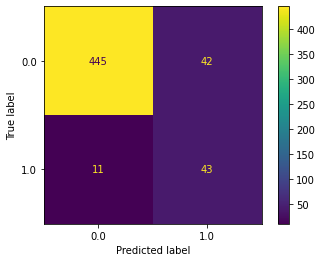

In [45]:
plt.figure(figsize=(20,10))
cm = ConfusionMatrixDisplay(confusion_matrix(test_y,lr_resampled.predict(test_x),labels=lr_resampled.classes_),display_labels=lr_resampled.classes_)
cm.plot()
plt.show()

# XGB

In [46]:
from xgboost import XGBClassifier

In [48]:
xgb = XGBClassifier(random_state=1)
xgb_grid = GridSearchCV(xgb,param_grid = {'n_estimators':[100,300],
                                       'max_depth':[3,10],'min_child_weight':[0.2,0.5],
                                         'eta':[0.1,0.2]},
                       scoring=['accuracy','recall','precision','f1'],
                        verbose=5,cv=ps,refit='f1')
xgb_grid.fit(array_x,array_y)

Fitting 1 folds for each of 16 candidates, totalling 16 fits
[19:30:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/1] END eta=0.1, max_depth=3, min_child_weight=0.2, n_estimators=100; accuracy: (test=0.885) f1: (test=0.500) precision: (test=0.369) recall: (test=0.775) total time=   0.8s
[19:30:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/1] END eta=0.1, max_depth=3, min_child_weight=0.2, n_estimators=300; accuracy: (test=0.906) f1: (test=0.532) precision: (test=0.420) recall: (test=0.725) total time=   2.2s
[19:31:01] WARNIN

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_we...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=1, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                          

F1 Score

In [49]:
xgb_resampled = xgb_grid.best_estimator_

In [50]:
f1_score(y_resampled,xgb_resampled.predict(X_resampled))

0.9747983870967742

In [51]:
f1_score(test_y,xgb_resampled.predict(test_x))

0.6229508196721312

In [52]:
xgb_resampled

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.1, gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.100000001,
              max_delta_step=0, max_depth=3, min_child_weight=0.2, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Accuracy Score

In [53]:
xgb_resampled = xgb_grid.best_estimator_
xgb_resampled.score(X_resampled,y_resampled)

0.9744637385086823

In [54]:
xgb_resampled.score(test_x,test_y)

0.9149722735674677

Recall Score

In [55]:
recall_score(y_resampled,xgb_resampled.predict(X_resampled))

0.9877425944841676

In [56]:
recall_score(test_y,xgb_resampled.predict(test_x))

0.7037037037037037

Precision Score

In [57]:
precision_score(y_resampled,xgb_resampled.predict(X_resampled))

0.9621890547263682

In [58]:
precision_score(test_y,xgb_resampled.predict(test_x))

0.5588235294117647

In [59]:
pd.Series(xgb_resampled.predict(test_x)).value_counts()

0.0    473
1.0     68
dtype: int64

In [60]:
test_y.value_counts()

PotentialFraud
0.0               487
1.0                54
dtype: int64

AUC Score

In [61]:
from sklearn.metrics import roc_auc_score

In [62]:
roc_auc_score(y_resampled,xgb_resampled.predict(X_resampled))

0.9744637385086824

In [63]:
roc_auc_score(test_y,xgb_resampled.predict(test_x))

0.8210510304966157

<Figure size 1440x720 with 0 Axes>

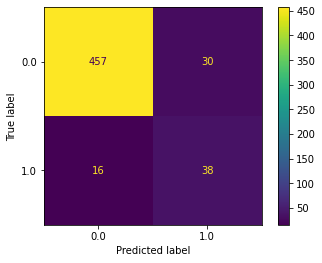

In [64]:
plt.figure(figsize=(20,10))
cm = ConfusionMatrixDisplay(confusion_matrix(test_y,xgb_resampled.predict(test_x),labels=xgb_resampled.classes_),display_labels=xgb_resampled.classes_)
cm.plot()
plt.show()

# Random Forest

## Without Adding Graph Features

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rf = RandomForestClassifier(random_state=1)
rf_grid = GridSearchCV(rf,param_grid = {'n_estimators':[50,100],
                                       'max_depth':[3,10,20],'min_samples_leaf':[10,20],
                                          'max_features':['sqrt', 20]},
                       scoring=['accuracy','recall','precision','f1'],
                        verbose=5,cv=ps,refit='f1')
rf_grid.fit(array_x,array_y)

Fitting 1 folds for each of 24 candidates, totalling 24 fits
[CV 1/1] END max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.834) f1: (test=0.423) precision: (test=0.284) recall: (test=0.825) total time=   0.4s
[CV 1/1] END max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.837) f1: (test=0.429) precision: (test=0.289) recall: (test=0.825) total time=   0.9s
[CV 1/1] END max_depth=3, max_features=sqrt, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.834) f1: (test=0.423) precision: (test=0.284) recall: (test=0.825) total time=   0.4s
[CV 1/1] END max_depth=3, max_features=sqrt, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.837) f1: (test=0.429) precision: (test=0.289) recall: (test=0.825) total time=   0.8s
[CV 1/1] END max_depth=3, max_features=20, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.834) f1: (test=0.423) precision: (test=0.284) recall: (test=0.825) total time=   1.1s
[CV 

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [3, 10, 20], 'max_features': ['sqrt', 20],
                         'min_samples_leaf': [10, 20],
                         'n_estimators': [50, 100]},
             refit='f1', scoring=['accuracy', 'recall', 'precision', 'f1'],
             verbose=5)

F1 Score

In [67]:
rf_resampled = rf_grid.best_estimator_

In [68]:
f1_score(y_resampled,rf_resampled.predict(X_resampled))

0.9659606656580938

In [69]:
f1_score(test_y,rf_resampled.predict(test_x))

0.6060606060606061

In [70]:
rf_resampled

RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=10,
                       random_state=1)

Accuracy Score

In [71]:
rf_resampled = rf_grid.best_estimator_
rf_resampled.score(X_resampled,y_resampled)

0.9655260469867212

In [72]:
rf_resampled.score(test_x,test_y)

0.9038817005545287

Recall Score

In [73]:
recall_score(y_resampled,rf_resampled.predict(X_resampled))

0.97829417773238

In [74]:
recall_score(test_y,rf_resampled.predict(test_x))

0.7407407407407407

Precision Score

In [75]:
precision_score(y_resampled,rf_resampled.predict(X_resampled))

0.9539342629482072

In [76]:
precision_score(test_y,rf_resampled.predict(test_x))

0.5128205128205128

In [77]:
pd.Series(rf_resampled.predict(test_x)).value_counts()

0.0    463
1.0     78
dtype: int64

In [78]:
test_y.value_counts()

PotentialFraud
0.0               487
1.0                54
dtype: int64

AUC Score

In [79]:
from sklearn.metrics import roc_auc_score

In [80]:
roc_auc_score(y_resampled,rf_resampled.predict(X_resampled))

0.9655260469867212

In [81]:
roc_auc_score(test_y,rf_resampled.predict(test_x))

0.8313559966537378

<Figure size 1440x720 with 0 Axes>

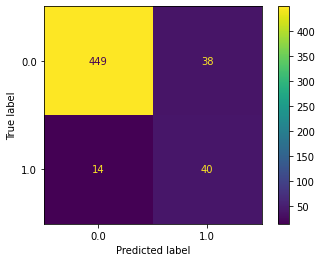

In [82]:
plt.figure(figsize=(20,10))
cm = ConfusionMatrixDisplay(confusion_matrix(test_y,rf_resampled.predict(test_x),labels=rf_resampled.classes_),display_labels=rf_resampled.classes_)
cm.plot()
plt.show()

feature importance on data with graph features

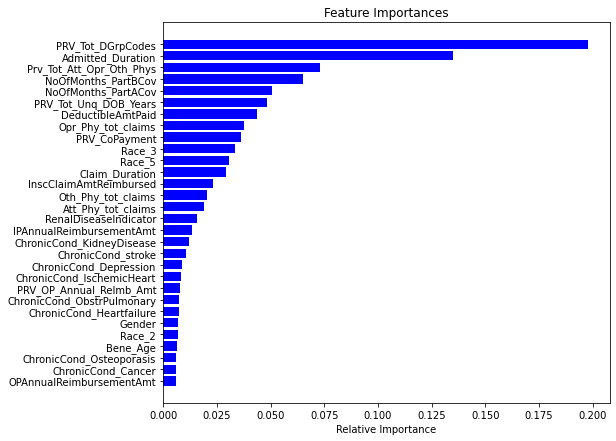

In [83]:
features = train_x.columns
importances = rf_resampled.feature_importances_
indices = (np.argsort(importances))[-30:]
plt.figure(figsize=(8,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## With Graph Features

In [85]:
graph_train = pd.read_csv('Final_Dataset/x_train_graph_features.csv')
graph_valid = pd.read_csv('Final_Dataset/x_valid_graph_features.csv')
graph_test = pd.read_csv('Final_Dataset/x_test_graph_features.csv')

In [86]:
train_x = pd.concat([train_x,graph_train],axis=1)
valid_x = pd.concat([valid_x,graph_valid],axis=1)
test_x = pd.concat([test_x,graph_test],axis=1)

In [87]:
random_seed=1

In [88]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(train_x, train_y)

from collections import Counter
print(sorted(Counter(y_resampled).items()))

[('PotentialFraud', 1)]


In [89]:
train_array_x = X_resampled.to_numpy()
train_array_y = y_resampled.to_numpy()
valid_array_x = valid_x.to_numpy()
valid_array_y = valid_y.to_numpy()
array_x = np.concatenate([train_array_x,valid_array_x],axis=0)
array_y = np.concatenate([train_array_y,valid_array_y],axis=0)
test_fold = np.concatenate([np.array(train_array_x.shape[0]*[-1,]),np.array(valid_array_x.shape[0]*[0,])],axis=0)

In [90]:
from sklearn.model_selection import PredefinedSplit

In [91]:
ps = PredefinedSplit(test_fold=test_fold)

In [93]:
rf = RandomForestClassifier(random_state=1)
rf_grid = GridSearchCV(rf,param_grid = {'n_estimators':[100,300],
                                       'max_depth':[10,20],'min_samples_leaf':[10,20],
                                          'max_features':['sqrt',20]},
                       scoring=['accuracy','recall','precision','f1'],
                        verbose=5,cv=ps,refit='f1')
rf_grid.fit(array_x,array_y)

Fitting 1 folds for each of 16 candidates, totalling 16 fits
[CV 1/1] END max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.887) f1: (test=0.504) precision: (test=0.373) recall: (test=0.775) total time=   2.0s
[CV 1/1] END max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.884) f1: (test=0.496) precision: (test=0.365) recall: (test=0.775) total time=   5.8s
[CV 1/1] END max_depth=10, max_features=sqrt, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.876) f1: (test=0.481) precision: (test=0.348) recall: (test=0.775) total time=   2.1s
[CV 1/1] END max_depth=10, max_features=sqrt, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.874) f1: (test=0.477) precision: (test=0.344) recall: (test=0.775) total time=   5.9s
[CV 1/1] END max_depth=10, max_features=20, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.896) f1: (test=0.517) precision: (test=0.395) recall: (test=0.750) total time=   5

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [10, 20], 'max_features': ['sqrt', 20],
                         'min_samples_leaf': [10, 20],
                         'n_estimators': [100, 300]},
             refit='f1', scoring=['accuracy', 'recall', 'precision', 'f1'],
             verbose=5)

F1 Score

In [94]:
rf_resampled = rf_grid.best_estimator_

In [95]:
f1_score(y_resampled,rf_resampled.predict(X_resampled))

0.9573400250941029

In [96]:
f1_score(test_y,rf_resampled.predict(test_x))

0.6466165413533835

In [97]:
rf_resampled

RandomForestClassifier(max_depth=20, max_features=20, min_samples_leaf=20,
                       random_state=1)

Accuracy Score

In [98]:
rf_resampled = rf_grid.best_estimator_
rf_resampled.score(X_resampled,y_resampled)

0.95658835546476

In [99]:
rf_resampled.score(test_x,test_y)

0.9131238447319778

Recall Score

In [100]:
recall_score(y_resampled,rf_resampled.predict(X_resampled))

0.9742083758937692

In [101]:
recall_score(test_y,rf_resampled.predict(test_x))

0.7962962962962963

Precision Score

In [102]:
precision_score(y_resampled,rf_resampled.predict(X_resampled))

0.9410458806117414

In [103]:
precision_score(test_y,rf_resampled.predict(test_x))

0.5443037974683544

In [104]:
pd.Series(rf_resampled.predict(test_x)).value_counts()

0.0    462
1.0     79
dtype: int64

In [105]:
test_y.value_counts()

PotentialFraud
0.0               487
1.0                54
dtype: int64

AUC Score

In [106]:
from sklearn.metrics import roc_auc_score

In [107]:
roc_auc_score(y_resampled,rf_resampled.predict(X_resampled))

0.95658835546476

In [108]:
roc_auc_score(test_y,rf_resampled.predict(test_x))

0.8611871625218648

<Figure size 1440x720 with 0 Axes>

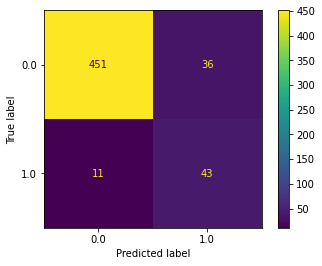

In [109]:
plt.figure(figsize=(20,10))
cm = ConfusionMatrixDisplay(confusion_matrix(test_y,rf_resampled.predict(test_x),labels=rf_resampled.classes_),display_labels=rf_resampled.classes_)
cm.plot()
plt.show()